In [1]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read Excel file.
data = pd.read_excel('C:/#In/Magnitt/MAGNiTT Data Test.xlsx',sheet_name='Raw Funding Data')

In [3]:
data.sample(10)

,Unique ID,Startup Name,Month,Quarter,Year,Geography,Industry,Funding Stage,Funding Amount
355,356,Startup 165,12,4,2017,Oman,Travel & Tourism,Pre-SEED,50000
652,653,Startup 143,9,3,2018,Oman,Professional Services,Pre-SEED,50000
601,602,Startup 414,9,3,2018,UAE,E-Commerce,Pre-Series A,0
87,88,Startup 475,4,2,2017,UAE,E-Commerce,Undisclosed,0
86,87,Startup 342,4,2,2017,Tunisia,Renewable Energy,SEED,200000
526,527,Startup 498,6,2,2018,UAE,Delivery & Transport,SEED,50000
602,603,Startup 466,9,3,2018,UAE,Consumer Services,Series B,4000000
18,19,Startup 260,1,1,2017,UAE,Travel & Tourism,SEED,13600
607,608,Startup 575,9,3,2018,Lebanon,Data Analytics & Business Intelligence,Series A,0
619,620,Startup 550,9,3,2018,-,IT Solutions,Pre-SEED,0


In [4]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
# Check for null values
data.isna().any()

Unique ID         False
Startup Name      False
Month             False
Quarter           False
Year              False
Geography         False
Industry          False
Funding Stage     False
Funding Amount    False
dtype: bool

In [6]:
data['Geography'] = data['Geography'].replace('-','Unknown')

In [7]:
data['Funding Stage'] = data['Funding Stage'].replace('SEED','Seed')

In [8]:
data = data[data.Year != 2020]

In [9]:
data['Date'] = pd.to_datetime(data.assign(Day=1).loc[:, ['Year','Month','Day']])

In [10]:
data['Geography'] = data['Geography'].replace('KSA','Saudi Arabia')

In [11]:
data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 733
Data columns (total 11 columns):
Unique ID         733 non-null int64
Startup Name      733 non-null object
Month             733 non-null int64
Quarter           733 non-null int64
Year              733 non-null int64
Geography         733 non-null object
Industry          733 non-null object
Funding Stage     733 non-null object
Funding Amount    733 non-null int64
Date              733 non-null datetime64[ns]
Month_Name        733 non-null object
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 68.7+ KB


In [13]:
data['Geography'].value_counts()

UAE             230
Egypt           135
Lebanon          90
Jordan           49
Saudi Arabia     44
Tunisia          42
Oman             35
Bahrain          28
Kuwait           20
Palestine        19
Unknown          19
Morocco           8
Syria             5
Qatar             4
Algeria           3
Yemen             2
Name: Geography, dtype: int64

In [14]:
data['Funding Stage'].value_counts()

Seed            309
Pre-SEED        201
Series A        100
Angel            54
Series B         24
Undisclosed      19
Pre-Series A      9
Bridge            8
Series C          4
Series E          2
Series F          1
Growth            1
Series D          1
Name: Funding Stage, dtype: int64

In [15]:
data_repeat = data[data['Startup Name'].isin(data['Startup Name'].value_counts()[data['Startup Name'].value_counts()>2].index)]

In [16]:
data_repeat['Industry'].value_counts()

Delivery & Transport    12
E-Commerce               7
Travel & Tourism         7
FinTech                  6
Food & Beverage          3
Healthcare               3
Technology               3
Agriculture              3
Name: Industry, dtype: int64

In [17]:
data_repeat['Geography'].value_counts()

UAE        24
Egypt      12
Bahrain     8
Name: Geography, dtype: int64

In [18]:
data_repeat.groupby(['Geography','Industry'])['Funding Amount'].count()

Geography  Industry            
Bahrain    E-Commerce              4
           Travel & Tourism        4
Egypt      Delivery & Transport    6
           Food & Beverage         3
           Healthcare              3
UAE        Agriculture             3
           Delivery & Transport    6
           E-Commerce              3
           FinTech                 6
           Technology              3
           Travel & Tourism        3
Name: Funding Amount, dtype: int64

In [19]:
data_repeat.groupby(['Industry','Geography'])['Funding Amount'].count()

Industry              Geography
Agriculture           UAE          3
Delivery & Transport  Egypt        6
                      UAE          6
E-Commerce            Bahrain      4
                      UAE          3
FinTech               UAE          6
Food & Beverage       Egypt        3
Healthcare            Egypt        3
Technology            UAE          3
Travel & Tourism      Bahrain      4
                      UAE          3
Name: Funding Amount, dtype: int64

In [20]:
len(data['Startup Name'].unique())

634

In [21]:
data['Startup Name'].value_counts().head()

Startup 615    4
Startup 258    4
Startup 20     3
Startup 582    3
Startup 561    3
Name: Startup Name, dtype: int64

In [22]:
data['Funding Stage'].value_counts()

Seed            309
Pre-SEED        201
Series A        100
Angel            54
Series B         24
Undisclosed      19
Pre-Series A      9
Bridge            8
Series C          4
Series E          2
Series F          1
Growth            1
Series D          1
Name: Funding Stage, dtype: int64

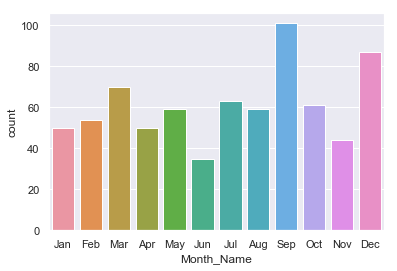

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Month_Name", data=data)

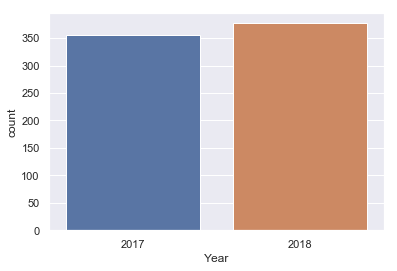

In [24]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Year", data=data)

In [25]:
data['Month_Year'] = data['Month_Name']+data['Year'].map(str)

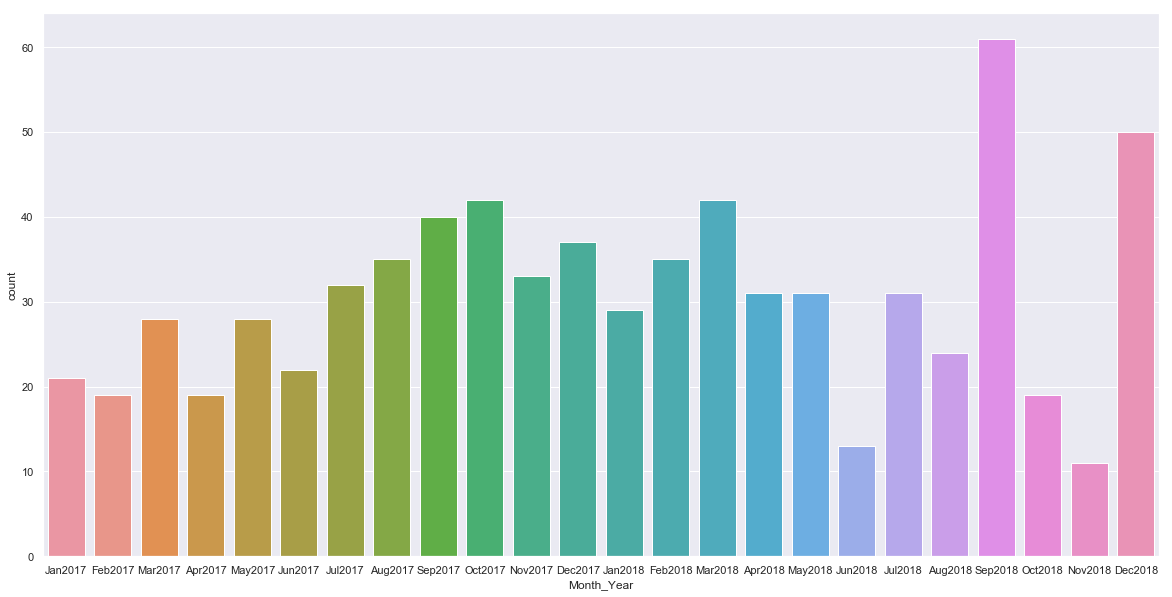

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="darkgrid")
ax = sns.countplot(x="Month_Year", data=data)

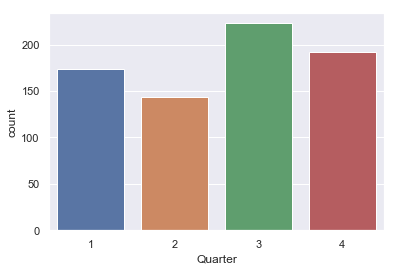

In [27]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Quarter", data=data)

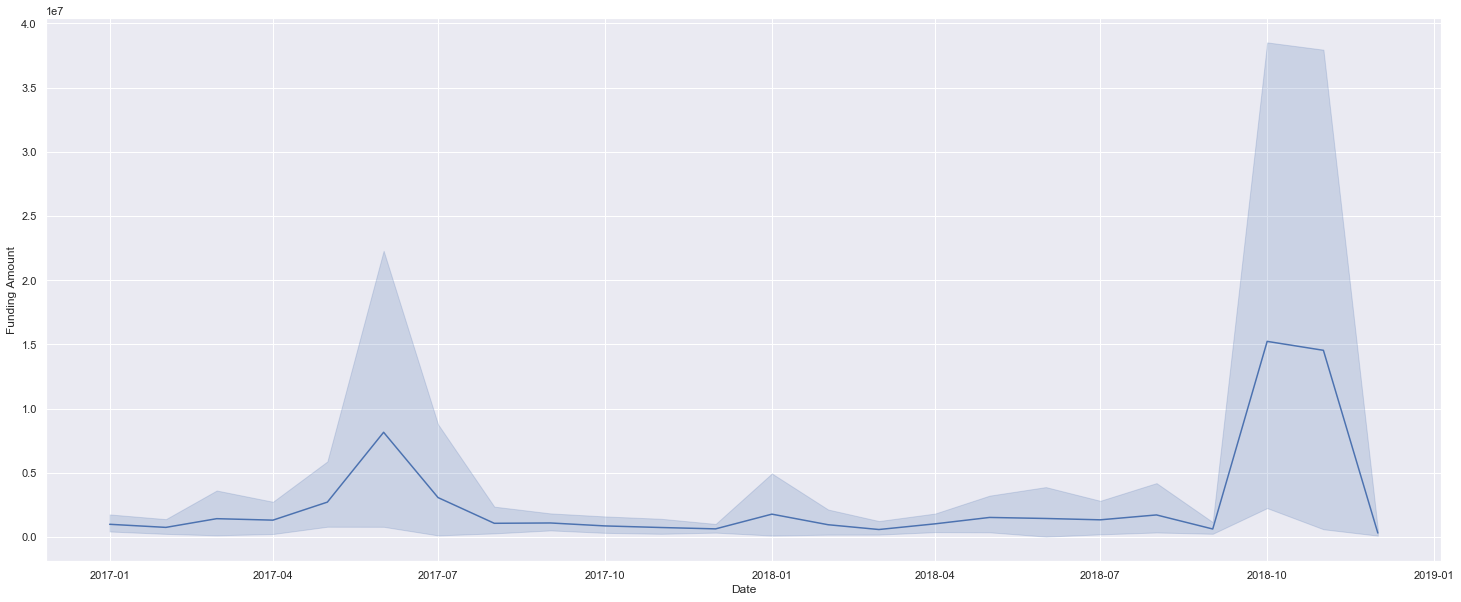

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.lineplot(x="Date", y="Funding Amount", data=data)

In [29]:
nonzero_data = data[data['Funding Amount']!= 0]

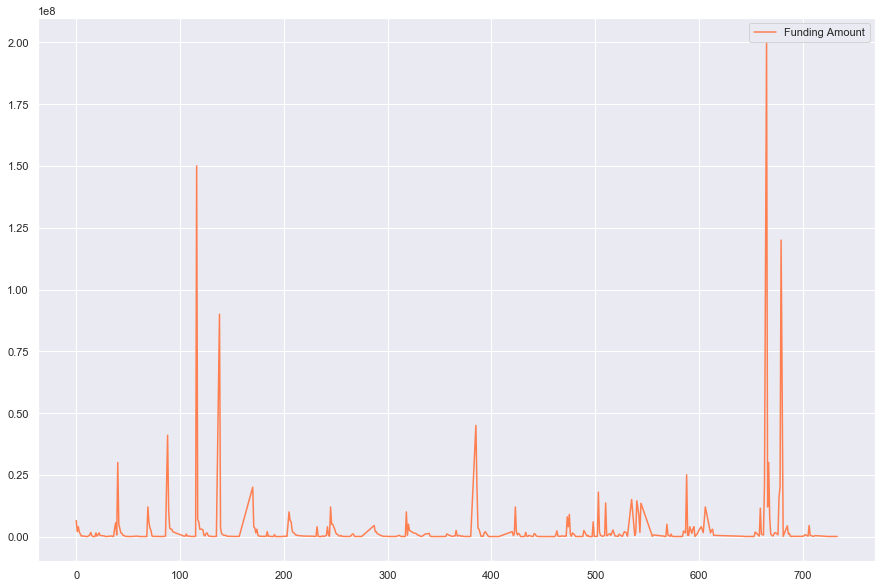

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=nonzero_data["Funding Amount"], color="coral", label="Funding Amount")

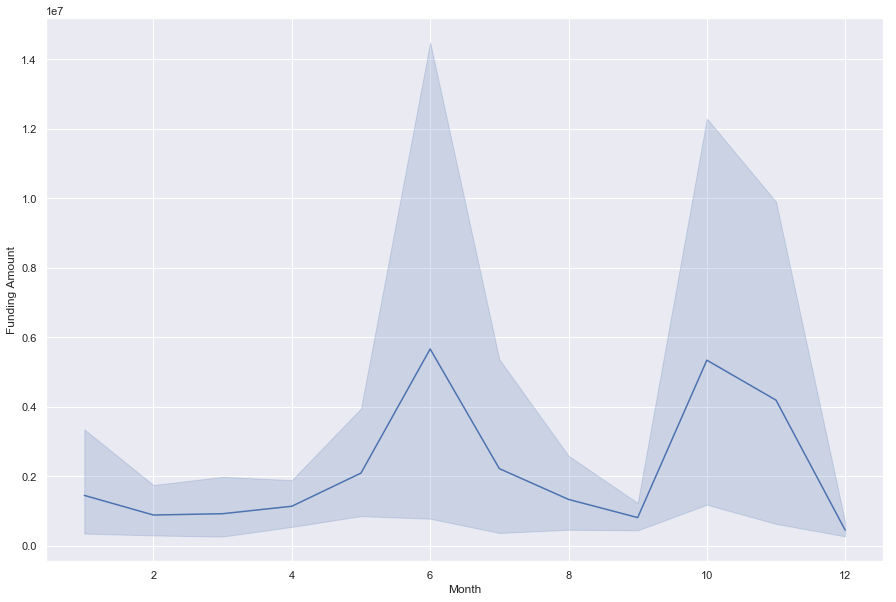

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(x="Month", y="Funding Amount", data=data)

In [32]:
data['Funding Amount'].nlargest(5)

665    200000000
116    150000000
679    120000000
138     90000000
385     45000000
Name: Funding Amount, dtype: int64

In [33]:
nonzero_data['Funding Amount'].nsmallest(5)

430    1000
461    1000
131    4000
429    5000
440    7000
Name: Funding Amount, dtype: int64

In [34]:
highest = data[data['Funding Amount'] >= 1800000]

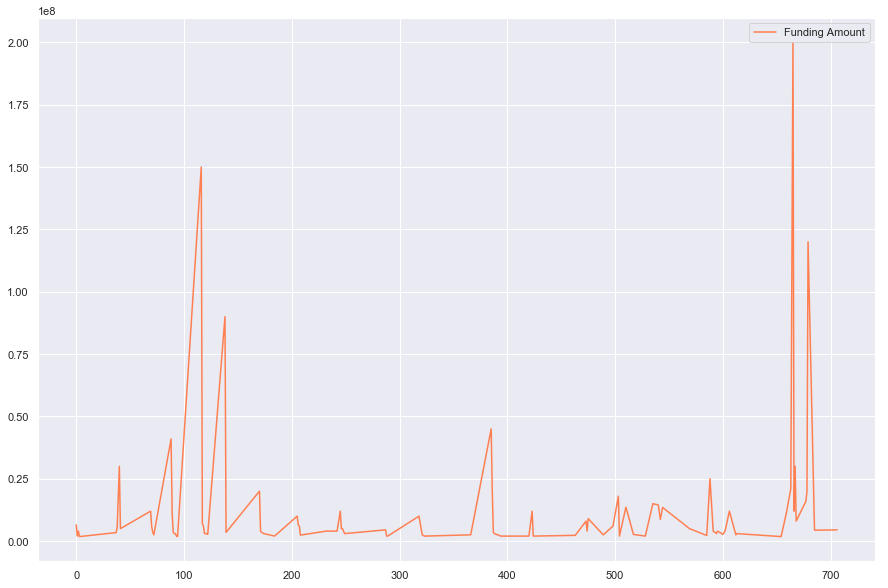

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(data=highest["Funding Amount"], color="coral", label="Funding Amount")

In [36]:
data['QuarterYear'] = data['Quarter'].map(str)+data['Year'].map(str)

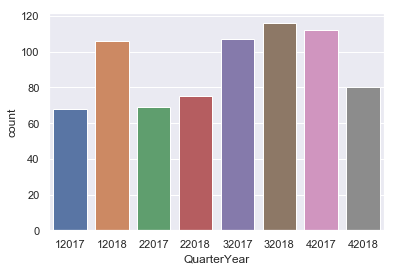

In [37]:
sns.set(style="darkgrid")
ax = sns.countplot(x="QuarterYear", data=data)

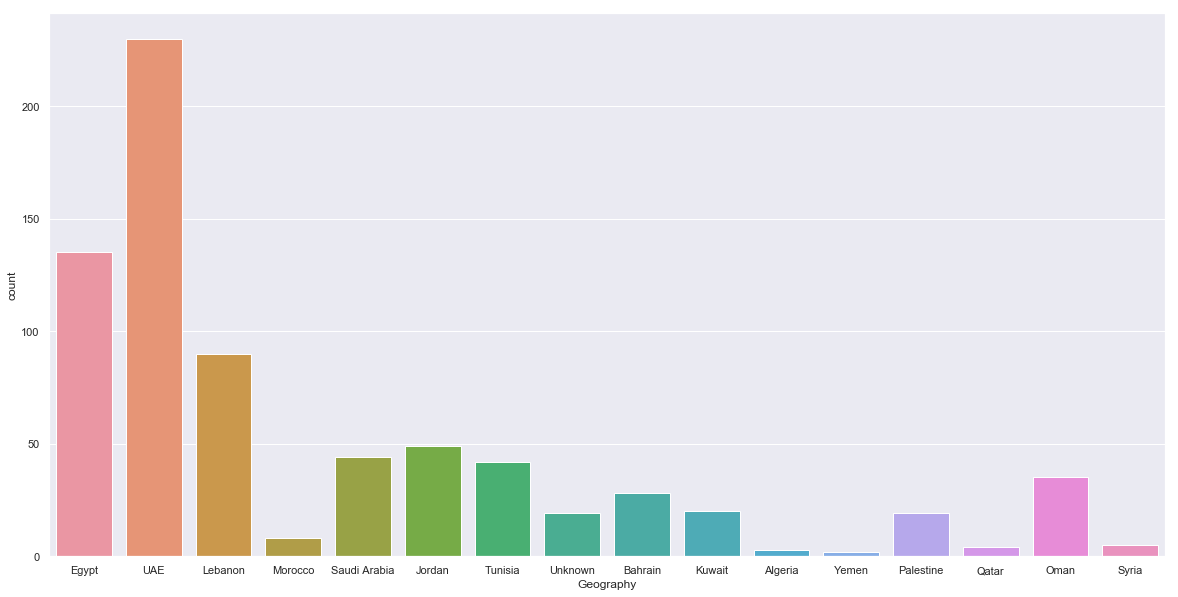

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="darkgrid")
ax = sns.countplot(x="Geography", data=data)

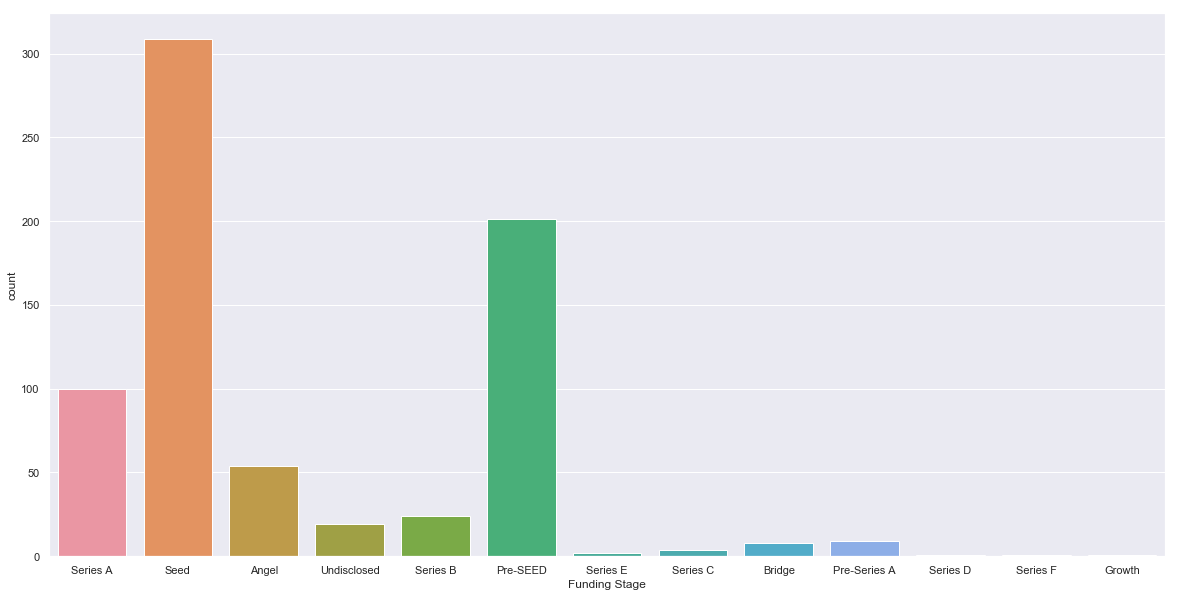

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="darkgrid")
ax = sns.countplot(x="Funding Stage", data=data)

In [40]:
data['Year'].value_counts()

2018    377
2017    356
Name: Year, dtype: int64

In [41]:
# Checking correlation
data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Unique ID,Startup Name,Month,Quarter,Year,Geography,Industry,Funding Stage,Funding Amount,Date,Month_Name,Month_Year,QuarterYear
Unique ID,1.000,0.821,0.400,0.365,0.866,0.136,0.034,0.303,0.089,0.997,0.400,0.997,0.990
Startup Name,0.821,1.000,0.315,0.288,0.713,0.144,0.052,0.279,0.101,0.814,0.315,0.814,0.808
Month,0.400,0.315,1.000,0.971,-0.108,0.171,0.017,0.228,0.050,0.429,1.000,0.429,0.401
Quarter,0.365,0.288,0.971,1.000,-0.129,0.133,0.020,0.211,0.046,0.394,0.971,0.394,0.396
Year,0.866,0.713,-0.108,-0.129,1.000,0.043,0.032,0.195,0.074,0.852,-0.108,0.852,0.859
Geography,0.136,0.144,0.171,0.133,0.043,1.000,-0.040,0.113,0.078,0.129,0.171,0.129,0.109
Industry,0.034,0.052,0.017,0.020,0.032,-0.040,1.000,0.011,0.029,0.038,0.017,0.038,0.040
Funding Stage,0.303,0.279,0.228,0.211,0.195,0.113,0.011,1.000,0.156,0.297,0.228,0.297,0.289
Funding Amount,0.089,0.101,0.050,0.046,0.074,0.078,0.029,0.156,1.000,0.094,0.050,0.094,0.093
Date,0.997,0.814,0.429,0.394,0.852,0.129,0.038,0.297,0.094,1.000,0.429,1.000,0.992


In [42]:
data[data['Year'] == 2017]['Funding Amount'].mean()

1734764.8876404495

In [43]:
data[data['Year'] == 2018]['Funding Amount'].mean()

2099765.960212202

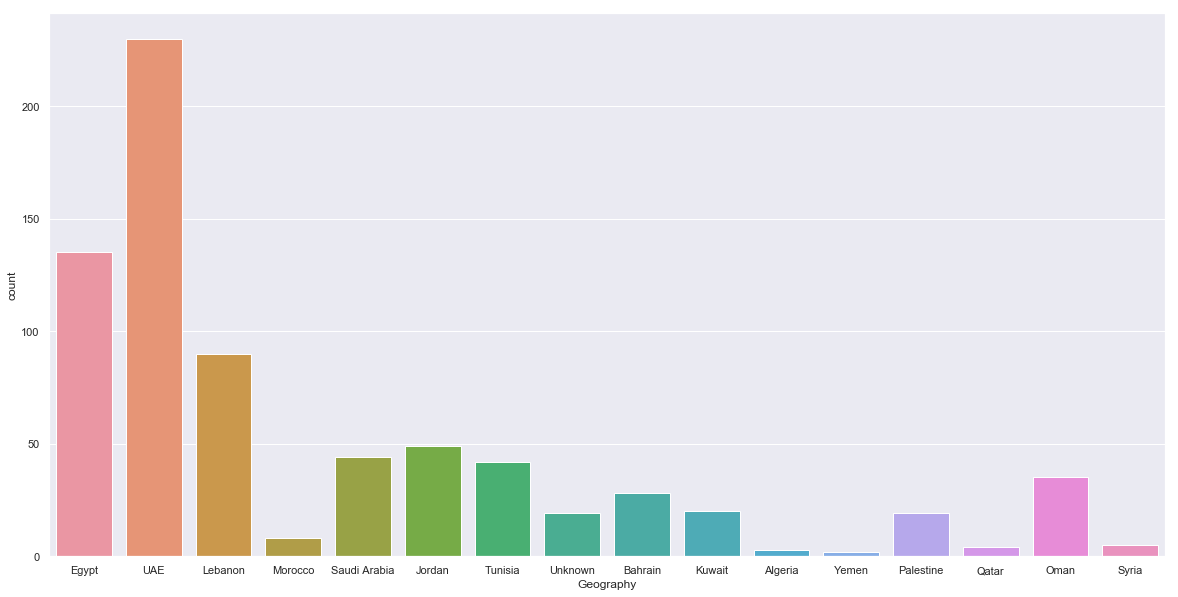

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.set(style="darkgrid")
ax = sns.countplot(x="Geography", data=data)

In [45]:
data.groupby(['Geography'])['Funding Amount'].mean()

Geography
Algeria         920000.000
Bahrain         164321.429
Egypt           608213.333
Jordan          695408.163
Kuwait         3253500.000
Lebanon         711211.111
Morocco         466750.000
Oman             67142.857
Palestine        22000.000
Qatar           287500.000
Saudi Arabia   1786508.341
Syria             4800.000
Tunisia         351190.476
UAE            4519486.522
Unknown         833157.895
Yemen           110000.000
Name: Funding Amount, dtype: float64

In [46]:
data.groupby(['Industry'])['Funding Amount'].sum().nlargest(10)

Industry
Delivery & Transport     438736600
E-Commerce               160576000
FinTech                  159499000
Real Estate              148170000
Entertainment & Music    102480000
Travel & Tourism          65355800
IT Solutions              61171667
Technology                45329200
Healthcare                43092000
Consumer Services         26310000
Name: Funding Amount, dtype: int64

In [47]:
data.groupby(['Industry'])['Funding Amount'].count().nlargest(10)

Industry
E-Commerce              83
FinTech                 81
Technology              60
Delivery & Transport    59
IT Solutions            55
Food & Beverage         43
Healthcare              41
Network & Community     33
Travel & Tourism        33
Education               29
Name: Funding Amount, dtype: int64

In [48]:
data.groupby(['Geography'])['Funding Amount'].count().nlargest(20)

Geography
UAE             230
Egypt           135
Lebanon          90
Jordan           49
Saudi Arabia     44
Tunisia          42
Oman             35
Bahrain          28
Kuwait           20
Palestine        19
Unknown          19
Morocco           8
Syria             5
Qatar             4
Algeria           3
Yemen             2
Name: Funding Amount, dtype: int64

In [49]:
data.groupby(['Geography','Industry'])['Funding Amount'].count().nlargest(20)

Geography  Industry            
UAE        FinTech                 43
           E-Commerce              27
           Delivery & Transport    22
           Technology              21
           Travel & Tourism        20
Egypt      Delivery & Transport    15
           E-Commerce              15
           Food & Beverage         12
Lebanon    IT Solutions            12
Egypt      Healthcare              11
           Technology              11
Lebanon    Technology              11
Egypt      Education               10
UAE        Consumer Services       10
Egypt      Network & Community      9
Jordan     FinTech                  9
UAE        IT Solutions             9
Egypt      FinTech                  8
Oman       IT Solutions             8
UAE        HR & Recruitment         8
Name: Funding Amount, dtype: int64

In [50]:
data.groupby(['Geography'])['Funding Amount'].mean().sort_values()

Geography
Syria             4800.000
Palestine        22000.000
Oman             67142.857
Yemen           110000.000
Bahrain         164321.429
Qatar           287500.000
Tunisia         351190.476
Morocco         466750.000
Egypt           608213.333
Jordan          695408.163
Lebanon         711211.111
Unknown         833157.895
Algeria         920000.000
Saudi Arabia   1786508.341
Kuwait         3253500.000
UAE            4519486.522
Name: Funding Amount, dtype: float64

In [51]:
data.groupby(['Geography'])['Funding Amount'].count().sort_values()

Geography
Yemen             2
Algeria           3
Qatar             4
Syria             5
Morocco           8
Palestine        19
Unknown          19
Kuwait           20
Bahrain          28
Oman             35
Tunisia          42
Saudi Arabia     44
Jordan           49
Lebanon          90
Egypt           135
UAE             230
Name: Funding Amount, dtype: int64

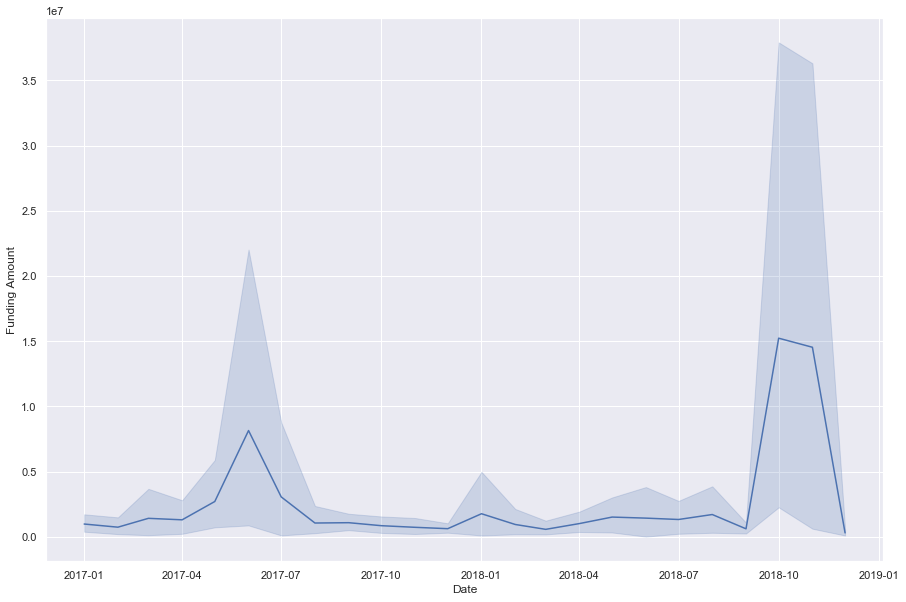

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(x="Date", y="Funding Amount", data=data)

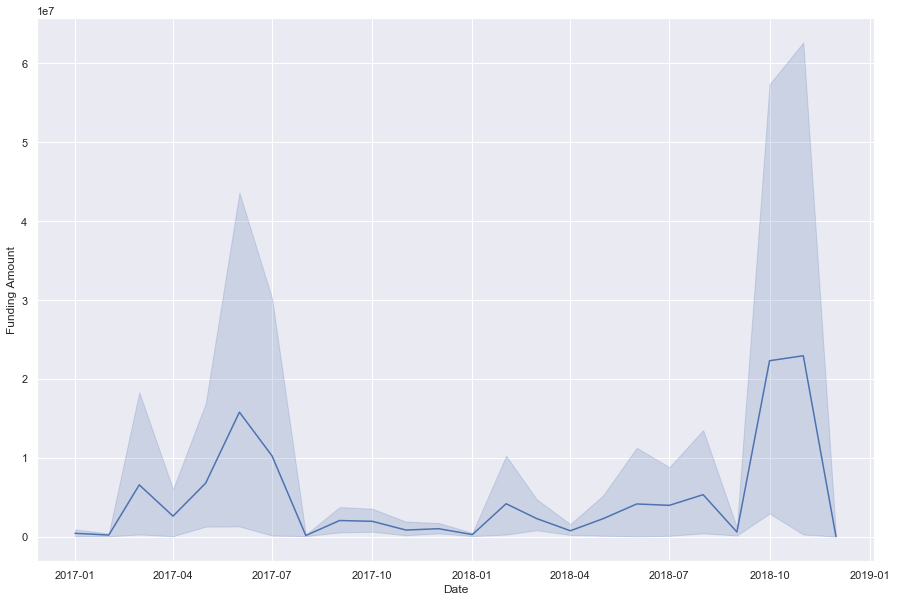

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(x="Date", y="Funding Amount", data=data[data['Geography']=="UAE"])

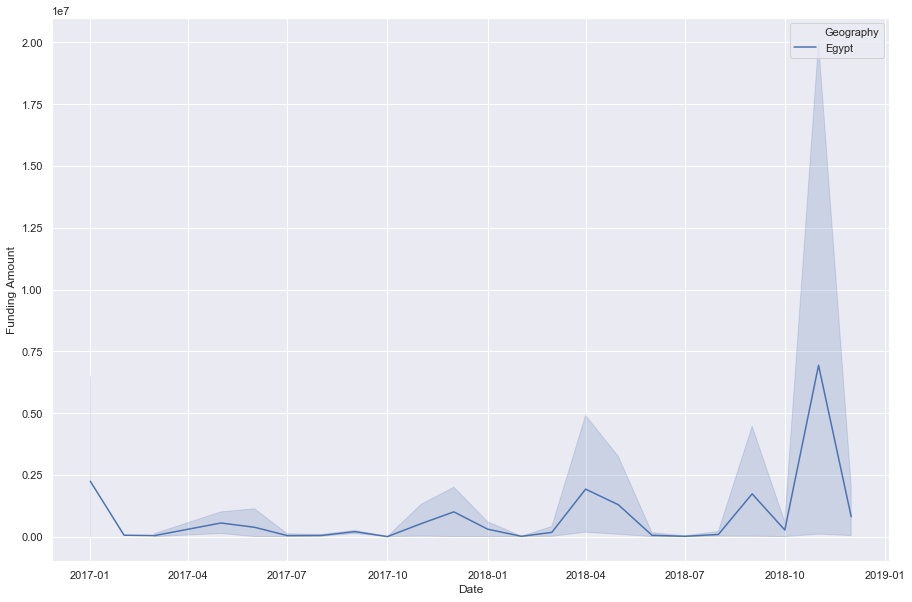

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.lineplot(x="Date", y="Funding Amount",hue="Geography", data=data[data['Geography']=='Egypt'])

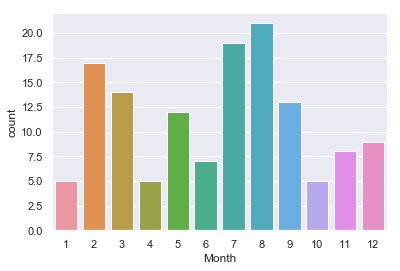

In [55]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Month", data=data[data['Geography']=="Egypt"])

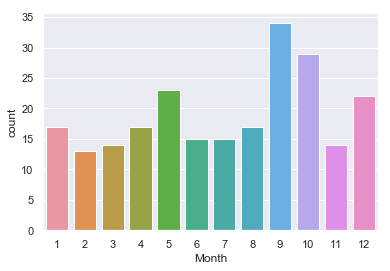

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Month", data=data[data['Geography']=="UAE"])

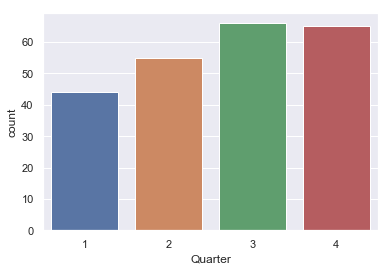

In [57]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Quarter", data=data[data['Geography'] == 'UAE'])

In [58]:
data[data['Industry']=='Real Estate']

,Unique ID,Startup Name,Month,Quarter,Year,Geography,Industry,Funding Stage,Funding Amount,Date,Month_Name,Month_Year,QuarterYear
304,305,Startup 402,11,4,2017,Lebanon,Real Estate,Pre-SEED,40000,2017-11-01,Nov,Nov2017,42017
373,374,Startup 16,1,1,2018,Jordan,Real Estate,Seed,50000,2018-01-01,Jan,Jan2018,12018
446,447,Startup 314,3,1,2018,Tunisia,Real Estate,Pre-SEED,30000,2018-03-01,Mar,Mar2018,12018
560,561,Startup 607,7,3,2018,UAE,Real Estate,Pre-SEED,0,2018-07-01,Jul,Jul2018,32018
588,589,Startup 63,8,3,2018,UAE,Real Estate,Series D,25000000,2018-08-01,Aug,Aug2018,32018
594,595,Startup 34,9,3,2018,Egypt,Real Estate,Series A,3000000,2018-09-01,Sep,Sep2018,32018
679,680,Startup 422,11,4,2018,UAE,Real Estate,Growth,120000000,2018-11-01,Nov,Nov2018,42018
728,729,Startup 391,12,4,2018,Oman,Real Estate,Pre-SEED,50000,2018-12-01,Dec,Dec2018,42018


In [59]:
def improvement(countries):
    print(countries)
    length = len(data['Geography'].unique())
    totals = data['Funding Amount'].sum()
    d={}
    for i in range(0,length):
        country = data[data['Geography'] == countries[i]]
        countrysum2017 = country[country['Date'] < '2018-01-01']['Funding Amount'].sum()
        countrysum2018 = country[country['Date'] >= '2018-01-01']['Funding Amount'].sum()
        d["{0}".format(countries[i])]=(countrysum2018-countrysum2017)/(totals)*100
    return d

In [60]:
info = improvement(data['Geography'].unique())

['Egypt' 'UAE' 'Lebanon' 'Morocco' 'Saudi Arabia' 'Jordan' 'Tunisia'
 'Unknown' 'Bahrain' 'Kuwait' 'Algeria' 'Yemen' 'Palestine' 'Qatar' 'Oman'
 'Syria']


In [61]:
info

{'Egypt': 3.253873707404875,
 'UAE': 8.317761322626925,
 'Lebanon': -1.742066979907232,
 'Morocco': -0.21998483187553133,
 'Saudi Arabia': -0.06483400061320559,
 'Jordan': 1.078990118924985,
 'Tunisia': -0.038319938455737716,
 'Unknown': -1.0949567599482093,
 'Bahrain': -0.21920424053661816,
 'Kuwait': 3.049273621190833,
 'Algeria': 0.0454162233549484,
 'Yemen': -0.00567702791936855,
 'Palestine': 0.00936709606695811,
 'Qatar': -0.08160727634092292,
 'Oman': 0.06031842164329085,
 'Syria': 0.0017031083758105652}

In [62]:
def improvementv2(countries):
    print(countries)
    length = len(data['Geography'].unique())
    totals2017 = data['Funding Amount'].sum()
    d={}
    for i in range(0,length):
        country = data[data['Geography'] == countries[i]]
        countrysum2017 = country[country['Date'] < '2018-01-01']['Funding Amount'].sum()
        countrysum2018 = country[country['Date'] >= '2018-01-01']['Funding Amount'].sum()
        d["{0}".format(countries[i])]=(countrysum2018)/(totals2017)*100
    return d

In [63]:
info = improvementv2(data['Geography'].unique())

['Egypt' 'UAE' 'Lebanon' 'Morocco' 'Saudi Arabia' 'Jordan' 'Tunisia'
 'Unknown' 'Bahrain' 'Kuwait' 'Algeria' 'Yemen' 'Palestine' 'Qatar' 'Oman'
 'Syria']


In [64]:
info

{'Egypt': 4.540274041363991,
 'UAE': 41.041179211177635,
 'Lebanon': 1.4000970106142687,
 'Morocco': 0.02249522313049788,
 'Saudi Arabia': 2.756648875312964,
 'Jordan': 1.7485245991655136,
 'Tunisia': 0.5041910420889194,
 'Unknown': 0.014192569798421376,
 'Bahrain': 0.0536479138380328,
 'Kuwait': 3.833413102553614,
 'Algeria': 0.1206368432865817,
 'Yemen': 0.004967399429447482,
 'Palestine': 0.01951478347282939,
 'Qatar': 0.0,
 'Oman': 0.11354055838737101,
 'Syria': 0.0017031083758105652}

In [65]:
sorted(info, key=info.get, reverse=True)[:3]

['UAE', 'Egypt', 'Kuwait']

In [66]:
(data.groupby(['Industry'])['Funding Amount'].sum().nlargest(20)/data.groupby(['Industry'])['Funding Amount'].count().nlargest(20)).sort_values()

Industry
Data Analytics & Business Intelligence    216750.000
Education                                 285620.690
Food & Beverage                           337527.907
Network & Community                       383303.030
Professional Services                     543260.870
Technology                                755486.667
Agriculture                              1000000.000
Healthcare                               1051024.390
Consumer Services                        1096250.000
IT Solutions                             1112212.127
Fashion & Beauty                         1180333.333
HR & Recruitment                         1524882.353
E-Commerce                               1934650.602
FinTech                                  1969123.457
Travel & Tourism                         1980478.788
Delivery & Transport                     7436213.559
Construction                                     nan
Creative                                         nan
Entertainment & Music                

In [67]:
def improvementindustry(industries):
    length = len(data['Industry'].unique())
    d={}
    totals = data['Funding Amount'].sum()
    for i in range(0,length):
        industry = data[data['Industry'] == industries[i]]
        industrysum2017 = industry[industry['Date'] < '2018-01-01']['Funding Amount'].sum()
        industrysum2018 = industry[industry['Date'] >= '2018-01-01']['Funding Amount'].sum()
        d["{0}".format(industries[i])]=(industrysum2018-industrysum2017)/(totals)*100
    return d

In [68]:
info = improvementindustry(data['Industry'].unique())

In [69]:
info

{'Healthcare': -0.9071890615150945,
 'Network & Community': -0.29371523197833044,
 'IT Solutions': 1.5060918763797622,
 'Technology': -1.2715974836593618,
 'E-Commerce': 8.342392527512086,
 'Food & Beverage': -0.12818019413444265,
 'FinTech': -4.824409288728386,
 'Delivery & Transport': 3.547901175918771,
 'Creative': 0.08103957354898607,
 'Gaming': 0.13441782856084886,
 'Education': 0.4021464652382697,
 'Agriculture': -0.6244730711305405,
 'Travel & Tourism': 1.7463815211259521,
 'Renewable Energy': 0.06157446407045115,
 'Advertising & Marketing': 0.10999241593776567,
 'Media': -0.6583223500997756,
 'Productivity Apps': 0.9328776128502371,
 'Consumer Services': -0.4193904375433517,
 'Data Analytics & Business Intelligence': 0.1997604199127809,
 'Sports & Fitness': 0.009509021764942322,
 'Fashion & Beauty': 0.8844809498376202,
 'HR & Recruitment': -0.8436773116671588,
 'Professional Services': -0.4523881623246814,
 'Entertainment & Music': -5.540779249303705,
 'Social Entrepreneurship'

In [70]:
sorted(info, key=info.get, reverse=True)[:4]

['Real Estate', 'E-Commerce', 'Delivery & Transport', 'Travel & Tourism']

In [71]:
sorted(info, key=info.get, reverse=False)[:4]

['Entertainment & Music', 'FinTech', 'Technology', 'Healthcare']

In [72]:
def improvementindustrysum(industries):
    length = len(data['Industry'].unique())
    totals = data['Funding Amount'].sum()
    d={}
    for i in range(0,length):
        industry = data[data['Industry'] == industries[i]]
        industrysum = industry['Funding Amount'].sum()
        d["{0}".format(industries[i])]=(industrysum)/(totals)*100
    return d

In [73]:
info = improvementindustrysum(data['Industry'].unique())

In [74]:
info

{'Healthcare': 3.05793108876787,
 'Network & Community': 0.89760907690116,
 'IT Solutions': 4.340915767916448,
 'Technology': 3.2166891745330113,
 'E-Commerce': 11.394930439756555,
 'Food & Beverage': 1.0299335014167417,
 'FinTech': 11.318503451392056,
 'Delivery & Transport': 31.133999093110404,
 'Creative': 0.1371002242527505,
 'Gaming': 0.2402660141174755,
 'Education': 0.5877852782016213,
 'Agriculture': 0.8515541879052827,
 'Travel & Tourism': 4.637833766158339,
 'Renewable Energy': 0.2989168088094518,
 'Advertising & Marketing': 0.20224411962750463,
 'Media': 0.8177049089360476,
 'Productivity Apps': 0.9831193099366488,
 'Consumer Services': 1.8670325569823323,
 'Data Analytics & Business Intelligence': 0.30762395038078333,
 'Sports & Fitness': 0.018876117831900432,
 'Fashion & Beauty': 1.5076766896863028,
 'HR & Recruitment': 1.8395699344223866,
 'Professional Services': 0.8866807981563755,
 'Entertainment & Music': 7.272272764711113,
 'Social Entrepreneurship': 0.01135405583873

In [75]:
sorted(info, key=info.get, reverse=True)[:4]

['Delivery & Transport', 'E-Commerce', 'FinTech', 'Real Estate']

In [76]:
data.loc[data['Funding Amount'].idxmax()]

Unique ID                          666
Startup Name               Startup 102
Month                               10
Quarter                              4
Year                              2018
Geography                          UAE
Industry          Delivery & Transport
Funding Stage                 Series F
Funding Amount               200000000
Date               2018-10-01 00:00:00
Month_Name                         Oct
Month_Year                     Oct2018
QuarterYear                      42018
Name: 665, dtype: object

In [77]:
data.groupby(['Funding Stage'])['Funding Amount'].mean().nlargest(20)

Funding Stage
Series F       200000000.000
Growth         120000000.000
Series E        75000000.000
Series C        31675000.000
Series D        25000000.000
Series B        10900000.000
Undisclosed      3447368.421
Series A         2832000.000
Bridge            951250.000
Pre-Series A      718888.889
Seed              480174.650
Angel             119909.259
Pre-SEED           41089.552
Name: Funding Amount, dtype: float64

In [78]:
data.groupby(['Funding Stage','Geography'])['Funding Amount'].count().nlargest(20)

Funding Stage  Geography   
Seed           UAE             108
               Egypt            55
Pre-SEED       Egypt            46
               Lebanon          35
               Oman             35
Series A       UAE              31
Pre-SEED       UAE              25
Seed           Jordan           25
Series A       Lebanon          25
Seed           Lebanon          23
               Saudi Arabia     22
               Tunisia          22
Angel          UAE              21
Series B       UAE              17
Pre-SEED       Tunisia          16
Angel          Egypt            14
Seed           Bahrain          14
               Palestine        14
Pre-SEED       Unknown          13
Series A       Egypt            13
Name: Funding Amount, dtype: int64

In [79]:
data['Funding Stage'].value_counts()

Seed            309
Pre-SEED        201
Series A        100
Angel            54
Series B         24
Undisclosed      19
Pre-Series A      9
Bridge            8
Series C          4
Series E          2
Series F          1
Growth            1
Series D          1
Name: Funding Stage, dtype: int64

In [80]:
data['Geography'].value_counts()

UAE             230
Egypt           135
Lebanon          90
Jordan           49
Saudi Arabia     44
Tunisia          42
Oman             35
Bahrain          28
Kuwait           20
Palestine        19
Unknown          19
Morocco           8
Syria             5
Qatar             4
Algeria           3
Yemen             2
Name: Geography, dtype: int64